The Newspaperdata.csv dataset contains information of nwespapers with their daily sales and sunday sales. We have to predict sunday sales of newspaper on the basis of daily sales of newspaper. For that build linear regression and polynomial regression models and evaluate the model by using evaluation metrics.


In [1]:
#Remove warnings
import warnings 
warnings.filterwarnings(action="ignore")

In [2]:
# import packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("./NewspaperData.csv")
df.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [8]:
# get general informationabs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     int64  
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 948.0 bytes


In [5]:
# get statistical information 
df.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [6]:
# chack NA values 
df.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
# Convert non numerical Newspaper column to numerical by label encoding 
from sklearn.preprocessing import LabelEncoder 
df['Newspaper'] = LabelEncoder().fit_transform(df['Newspaper'])

In [9]:
df.corr()

,Newspaper,daily,sunday
Newspaper,1.000000,0.003978,0.031973
daily,0.003978,1.000000,0.958154
sunday,0.031973,0.958154,1.000000


In [10]:
# since relation between Newspaper and Sunday sales is very less we drop this column 
df.drop(['Newspaper'], axis=1, inplace=True)

In [11]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot: >

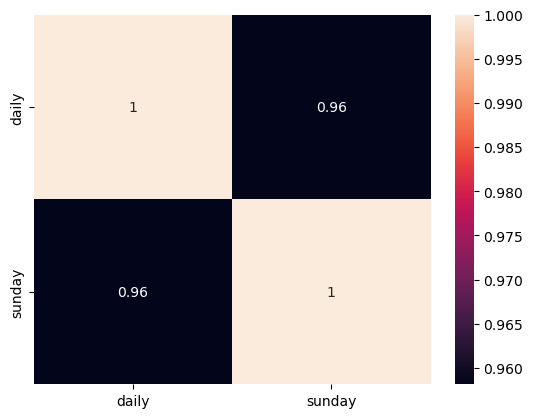

In [12]:
sns.heatmap(df.corr(), annot=True)

In [13]:
# split data in x and y

In [14]:
# x 
x = df.drop(['sunday'], axis=1)

#y
y = df['sunday']

In [15]:
# split data in x train and x test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=12345
)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [20]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 42.44
Mean Squared Error (MSE): 2908.30
Root Mean Squared Error (RMSE): 53.93
R-squared (R²): 0.97
